In [1]:
import pandas as pd
import numpy as np
from regression import create_regression_data_OLS, fit_OLS_model
from plots import plot_reg_lines

In [2]:
raw_df = pd.read_excel("../data/IE_fnl_fnl_data.xlsx")
raw_df

mean_trade_raw_df = pd.read_excel("../data/output.xlsx")

raw_df["mean_trade"] = mean_trade_raw_df["mean_trade"]
raw_df

,year,country_id_o,country_id_d,gdp_o,gdp_d,dist,tradeflow_baci,Corruption_India,Corruption_X,NRE_India,NRE_x,LSC_India,LSC_x,mean_trade
0,2016,IND,AUS,2.263522e+09,1.204616e+09,10418,3.226903e+06,-0.336942,1.772004,1.748390,4.080988,56.521741,34.246847,3.181812e+06
1,2016,IND,BRN,2.263522e+09,1.140027e+07,4767,4.449092e+04,-0.336942,-0.267868,1.748390,1.052474,56.521741,138.854355,3.856700e+04
2,2016,IND,CAN,2.263522e+09,1.529760e+09,11646,2.481290e+06,-0.336942,0.530952,1.748390,15.673771,56.521741,5.937048,2.527817e+06
3,2016,IND,CHL,2.263522e+09,2.470279e+08,16927,7.948060e+05,-0.336942,1.944438,1.748390,0.786495,56.521741,43.619168,6.898572e+05
4,2016,IND,CHN,2.263522e+09,1.119915e+10,4252,9.118677e+06,-0.336942,1.023325,1.748390,3.205696,56.521741,34.745459,1.035317e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89,2020,IND,RUS,2.667688e+09,1.488322e+09,4341,2.864933e+06,-0.292916,-0.929950,1.784669,7.588125,57.218541,34.608295,3.009011e+06
90,2020,IND,SGP,2.667688e+09,3.452959e+08,4145,7.351893e+06,-0.292916,2.118317,1.784669,0.000242,57.218541,113.774980,6.199136e+06
91,2020,IND,THA,2.667688e+09,4.996818e+08,2922,4.098798e+06,-0.292916,-0.483640,1.784669,1.109568,57.218541,63.402806,4.044340e+06
92,2020,IND,USA,2.667688e+09,2.089374e+10,11771,4.964978e+07,-0.292916,1.038217,1.784669,0.329506,57.218541,103.852253,5.026465e+07


In [3]:
raw_df.columns

Index(['year', 'country_id_o', 'country_id_d', 'gdp_o', 'gdp_d', 'dist',
       'tradeflow_baci', 'Corruption_India', 'Corruption_X', 'NRE_India',
       'NRE_x', 'LSC_India', 'LSC_x', 'mean_trade'],
      dtype='object')

In [4]:
raw_df['Corruption_India'] = (raw_df['Corruption_India'] - raw_df['Corruption_India'].min()) / (raw_df['Corruption_India'].max() - raw_df['Corruption_India'].min())+1
raw_df['Corruption_X'] = (raw_df['Corruption_X'] - raw_df['Corruption_X'].min()) / (raw_df['Corruption_X'].max() - raw_df['Corruption_X'].min())+1
raw_df

,year,country_id_o,country_id_d,gdp_o,gdp_d,dist,tradeflow_baci,Corruption_India,Corruption_X,NRE_India,NRE_x,LSC_India,LSC_x,mean_trade
0,2016,IND,AUS,2.263522e+09,1.204616e+09,10418,3.226903e+06,1.000000,1.856575,1.748390,4.080988,56.521741,34.246847,3.181812e+06
1,2016,IND,BRN,2.263522e+09,1.140027e+07,4767,4.449092e+04,1.000000,1.226765,1.748390,1.052474,56.521741,138.854355,3.856700e+04
2,2016,IND,CAN,2.263522e+09,1.529760e+09,11646,2.481290e+06,1.000000,1.473401,1.748390,15.673771,56.521741,5.937048,2.527817e+06
3,2016,IND,CHL,2.263522e+09,2.470279e+08,16927,7.948060e+05,1.000000,1.909814,1.748390,0.786495,56.521741,43.619168,6.898572e+05
4,2016,IND,CHN,2.263522e+09,1.119915e+10,4252,9.118677e+06,1.000000,1.625421,1.748390,3.205696,56.521741,34.745459,1.035317e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89,2020,IND,RUS,2.667688e+09,1.488322e+09,4341,2.864933e+06,1.409431,1.022347,1.784669,7.588125,57.218541,34.608295,3.009011e+06
90,2020,IND,SGP,2.667688e+09,3.452959e+08,4145,7.351893e+06,1.409431,1.963499,1.784669,0.000242,57.218541,113.774980,6.199136e+06
91,2020,IND,THA,2.667688e+09,4.996818e+08,2922,4.098798e+06,1.409431,1.160145,1.784669,1.109568,57.218541,63.402806,4.044340e+06
92,2020,IND,USA,2.667688e+09,2.089374e+10,11771,4.964978e+07,1.409431,1.630018,1.784669,0.329506,57.218541,103.852253,5.026465e+07


In [5]:
ln_df = np.log(raw_df[['gdp_o', 'gdp_d', 'dist',
       'tradeflow_baci', 'NRE_India','NRE_x', 'LSC_India', 'LSC_x', 'Corruption_India', 'Corruption_X', 'mean_trade']])
ln_df.dropna

<bound method DataFrame.dropna of         gdp_o      gdp_d      dist  tradeflow_baci  NRE_India     NRE_x  \
0   21.540188  20.909427  9.251290       14.987033   0.558695  1.406339   
1   21.540188  16.249147  8.469472       10.703040   0.558695  0.051144   
2   21.540188  21.148377  9.362718       14.724289   0.558695  2.751989   
3   21.540188  19.325012  9.736665       13.585853   0.558695 -0.240169   
4   21.540188  23.139103  8.355145       16.025835   0.558695  1.164929   
..        ...        ...       ...             ...        ...       ...   
89  21.704478  21.120915  8.375860       14.868055   0.579233  2.026585   
90  21.704478  19.659912  8.329658       15.810468   0.579233 -8.326573   
91  21.704478  20.029482  7.980024       15.226204   0.579233  0.103971   
92  21.704478  23.762716  9.373394       17.720505   0.579233 -1.110161   
93  21.704478  19.653948  8.203030       15.341894   0.579233  0.593814   

    LSC_India     LSC_x  Corruption_India  Corruption_X  mean_tra

In [6]:
X, y = create_regression_data_OLS(ln_df, [
        'gdp_o', 'gdp_d', 'dist', 'NRE_India','NRE_x', 'LSC_India', 'LSC_x', 'Corruption_India', 'Corruption_X'
    ], "tradeflow_baci")
X

,const,gdp_o,gdp_d,dist,NRE_India,NRE_x,LSC_India,LSC_x,Corruption_India,Corruption_X
0,1.0,21.540188,20.909427,9.251290,0.558695,1.406339,4.034625,3.533595,0.000000,0.618733
1,1.0,21.540188,16.249147,8.469472,0.558695,0.051144,4.034625,4.933426,0.000000,0.204381
2,1.0,21.540188,21.148377,9.362718,0.558695,2.751989,4.034625,1.781212,0.000000,0.387573
3,1.0,21.540188,19.325012,9.736665,0.558695,-0.240169,4.034625,3.775497,0.000000,0.647006
4,1.0,21.540188,23.139103,8.355145,0.558695,1.164929,4.034625,3.548049,0.000000,0.485767
...,...,...,...,...,...,...,...,...,...,...
89,1.0,21.704478,21.120915,8.375860,0.579233,2.026585,4.046878,3.544093,0.343186,0.022101
90,1.0,21.704478,19.659912,8.329658,0.579233,-8.326573,4.046878,4.734223,0.343186,0.674728
91,1.0,21.704478,20.029482,7.980024,0.579233,0.103971,4.046878,4.149508,0.343186,0.148545
92,1.0,21.704478,23.762716,9.373394,0.579233,-1.110161,4.046878,4.642969,0.343186,0.488591


In [7]:
y

0     14.987033
1     10.703040
2     14.724289
3     13.585853
4     16.025835
        ...    
89    14.868055
90    15.810468
91    15.226204
92    17.720505
93    15.341894
Name: tradeflow_baci, Length: 94, dtype: float64

In [8]:
gravity_model = fit_OLS_model(X, y)

In [9]:
gravity_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         tradeflow_baci   R-squared:                       0.804
Model:                            OLS   Adj. R-squared:                  0.783
Method:                 Least Squares   F-statistic:                     38.34
Date:                Tue, 22 Oct 2024   Prob (F-statistic):           4.21e-26
Time:                        13:07:21   Log-Likelihood:                -101.19
No. Observations:                  94   AIC:                             222.4
Df Residuals:                      84   BIC:                             247.8
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const              -64.3552    530.176     -0.121      0.904   -1118.668     989.958
gdp_o                1.2269     10.578      0.116      0.908     -19.808      22.262
gdp_d                0.8233      0.049     16.756      0.000       0.726       0.921
dist                -0.3496      0.185     -1.894      0.062      -0.717       0.017
NRE_India            3.2601     22.074      0.148      0.883     -40.636      47.156
NRE_x               -0.1183      0.049     -2.393      0.019      -0.217      -0.020
LSC_India            9.2705     72.175      0.128      0.898    -134.258     152.799
LSC_x                0.0362      0.129      0.280      0.780      -0.221       0.293
Corruption_India    -1.1971      8.961     -0.134      0.894     -19.017      16.623
Corruption_X        -0.9428      0.522     -1.806      0.075      -1.981       0.095
==============================================================================
Omnibus:                        0.891   Durbin-Watson:                   1.667
Prob(Omnibus):                  0.641   Jarque-Bera (JB):                0.990
Skew:                          -0.166   Prob(JB):                        0.609
Kurtosis:                       2.622   Cond. No.                     2.18e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.18e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

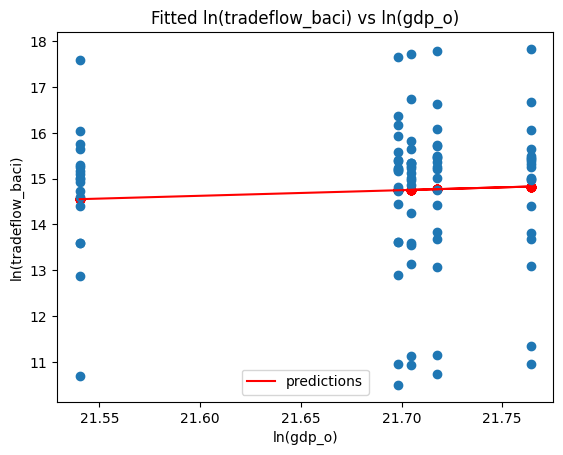

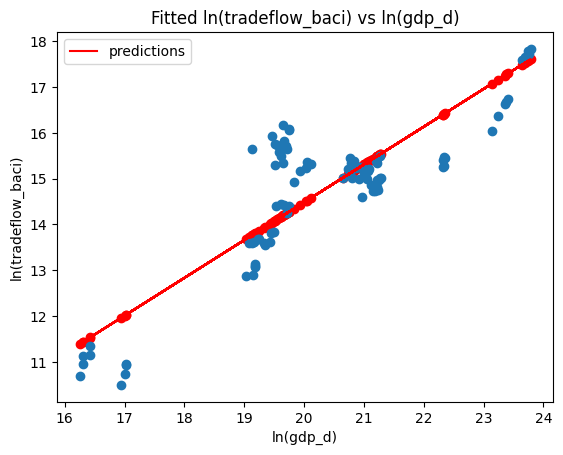

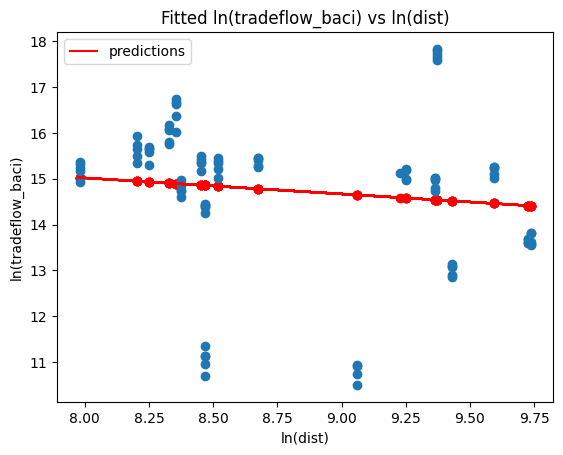

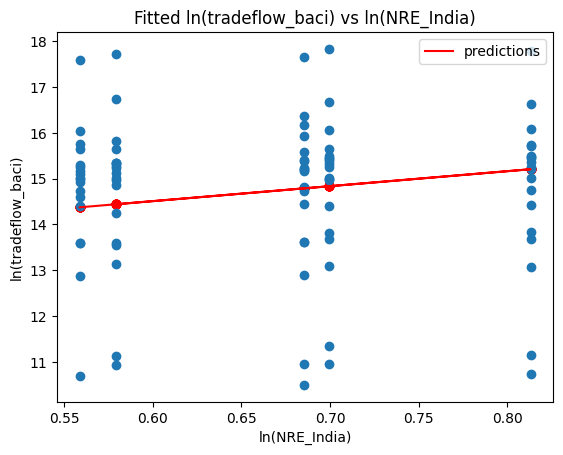

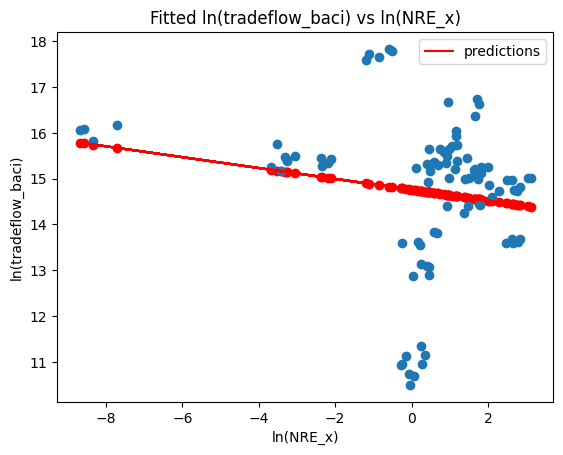

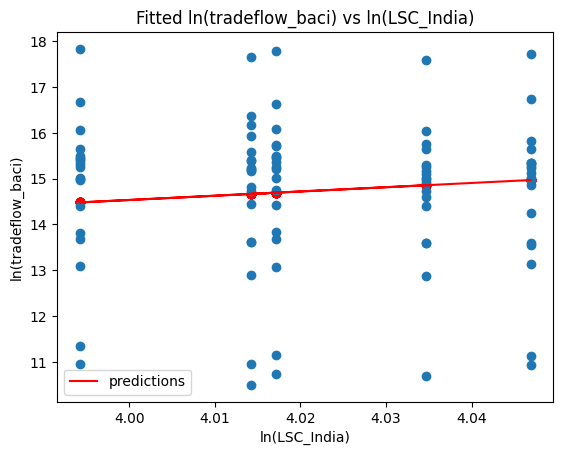

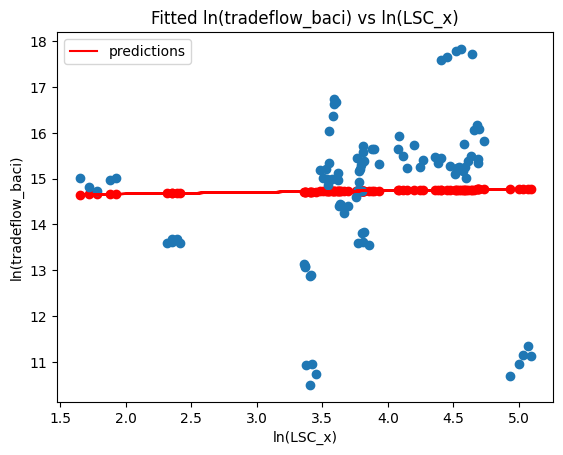

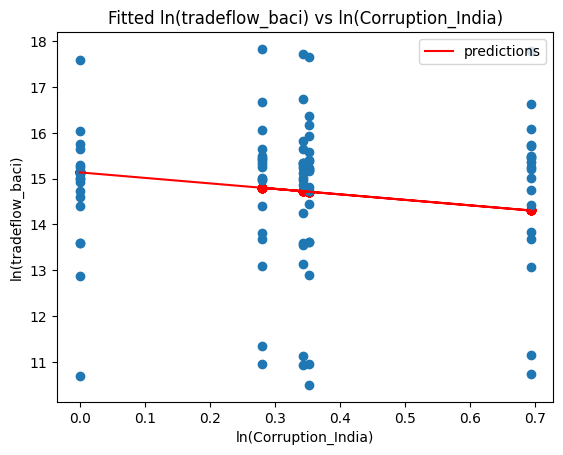

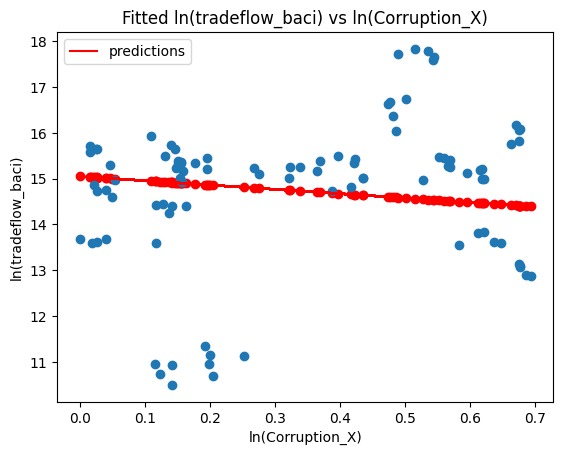

In [10]:
plot_reg_lines(ln_df, gravity_model, [
        'gdp_o', 'gdp_d', 'dist', 'NRE_India','NRE_x', 'LSC_India', 'LSC_x', 'Corruption_India', 'Corruption_X'
    ], "tradeflow_baci")